# Fashion MNIST

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Goal: classify grayscale Fashion_MNIST images into 10 classes

In [116]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
print(f"Tensorflow: {tf.__version__}\nKeras: {keras.__version__}")

Tensorflow: 2.12.0
Keras: 2.12.0


In [117]:
import matplotlib.pyplot as plt
import numpy as np
import random
from typing import Optional

# 1. Load Dataset

In [118]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [119]:
type(X_train), type (y_train)

(numpy.ndarray, numpy.ndarray)

In [120]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [121]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [122]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_nums = len(class_names)

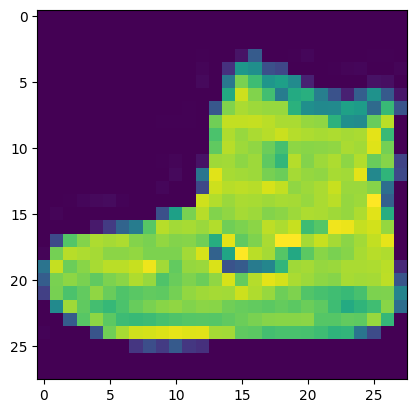

In [123]:
plt.imshow(X_train[0])

In [124]:
def plot_data (x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray] = None) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

    len_x = x_data.shape[0]
    for idx in range (nrows*ncols):
        ax = axes[idx // ncols, idx % ncols]
        img_idx = random.randint(0, len_x)

        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])

        true_label_str = f"True: {class_names[y_data[img_idx]]}"

        color = 'blue'
        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            predicted_label = class_names[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_idx] else color 
            predicted_label_str = f'\nPredicted: {predicted_label}'

        img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
        ax.set_xlabel(img_title, color = color, fontsize = 12)
    
    plt.tight_layout()
    plt.show()



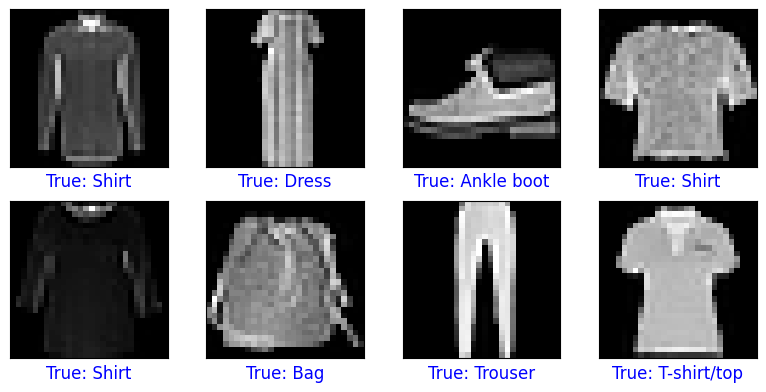

In [125]:
plot_data(X_train, y_train)

# 2. Image Pre_processing

- Reshaping it into the shape the model expects and scaling it so that all values are in the `[0, 1]` interval
- Transform from `unit8` it into a `float32`

In [126]:
#Convert to float32 & Scale iamges from [0, 255] to the [0, 1] range for training

X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255    

In [127]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [128]:
# Make sure images have shape (60000, 28, 28) -> (60000, 28, 28, 1)

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [129]:
# Convert class vector to binary class metrices: 1 -> [0, 1, 0, 0, ...]
# 1                             => sparse_categorical_crossentropy
# [0, 1, 0, 0, ...]             => categorical_crossentropy

y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

# 3. ANN

In [130]:
input_shape = (28, 28, 1)

In [131]:
model = keras.models.Sequential([
    layers.Flatten(input_shape = input_shape), # (28, 28, 1) -> (28 * 28 = 284)
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
])

In [132]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [134]:
epochs = 10
batch_size = 256

In [135]:
history = model.fit(X_train, y_train_label, 
          epochs=epochs,
          batch_size=batch_size,
          validation_split = 0.1)

Epoch 1/10
211/211 [==============================] - 3s 12ms/step - loss: 0.6286 - accuracy: 0.7737 - val_loss: 0.4483 - val_accuracy: 0.8307
Epoch 2/10
211/211 [==============================] - 2s 11ms/step - loss: 0.4158 - accuracy: 0.8480 - val_loss: 0.4199 - val_accuracy: 0.8400
Epoch 3/10
211/211 [==============================] - 2s 10ms/step - loss: 0.3643 - accuracy: 0.8658 - val_loss: 0.3793 - val_accuracy: 0.8623
Epoch 4/10
211/211 [==============================] - 3s 14ms/step - loss: 0.3302 - accuracy: 0.8767 - val_loss: 0.3529 - val_accuracy: 0.8742
Epoch 5/10
211/211 [==============================] - 3s 16ms/step - loss: 0.3070 - accuracy: 0.8864 - val_loss: 0.3866 - val_accuracy: 0.8658
Epoch 6/10
211/211 [==============================] - 3s 17ms/step - loss: 0.2887 - accuracy: 0.8917 - val_loss: 0.3203 - val_accuracy: 0.8843
Epoch 7/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2737 - accuracy: 0.8963 - val_loss: 0.3409 - val_accuracy: 0.8782

In [136]:
history_dict = history.history

In [137]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [138]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

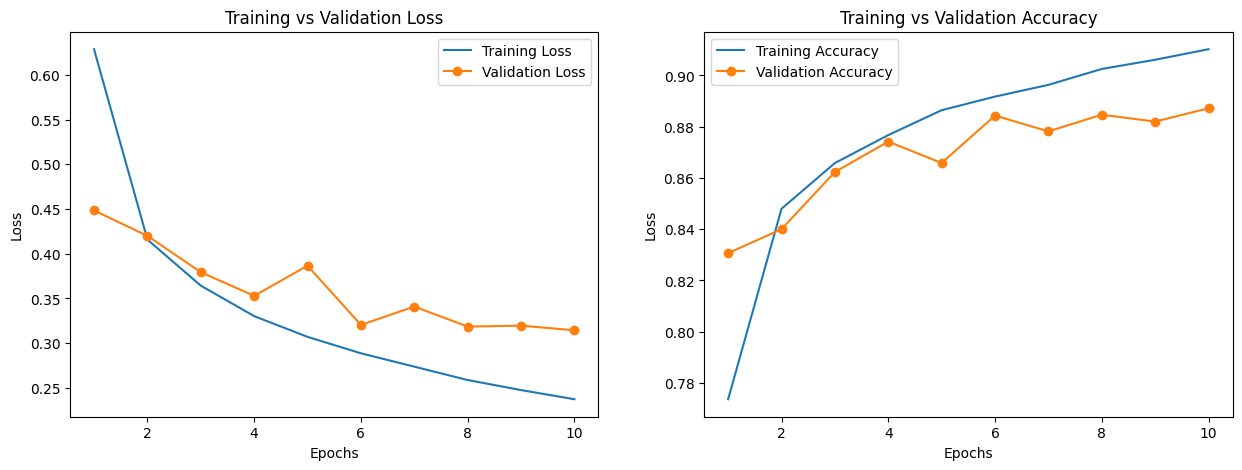

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
epochs_runs = [i+1 for i in range(epochs)]

ax1.plot(epochs_runs, train_loss, label='Training Loss')
ax1.plot(epochs_runs, val_loss, label='Validation Loss', marker='o')
ax1.set(title='Training vs Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epochs_runs, train_acc, label='Training Accuracy')
ax2.plot(epochs_runs, val_acc, label='Validation Accuracy', marker='o')
ax2.set(title='Training vs Validation Accuracy', xlabel='Epochs', ylabel='Loss')
ax2.legend()

plt.show()

# 4. Model Evaluation

In [140]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.8861


In [141]:
print(f'Test Loss: {score[0]:.4f}')
print(f'Test Accuracy: {score[1]:.4f}')

Test Loss: 0.3288
Test Accuracy: 0.8861


# 5. Prediction

In [142]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)

1/1 [==============================] - 0s 55ms/step


In [143]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [144]:
prediction = np.argmax(y_proba, axis = 1)

In [145]:
[class_names[pred] for pred in prediction]

['Ankle boot', 'Pullover', 'Trouser']

In [146]:
y_proba = model.predict(X_test)


313/313 [==============================] - 1s 3ms/step


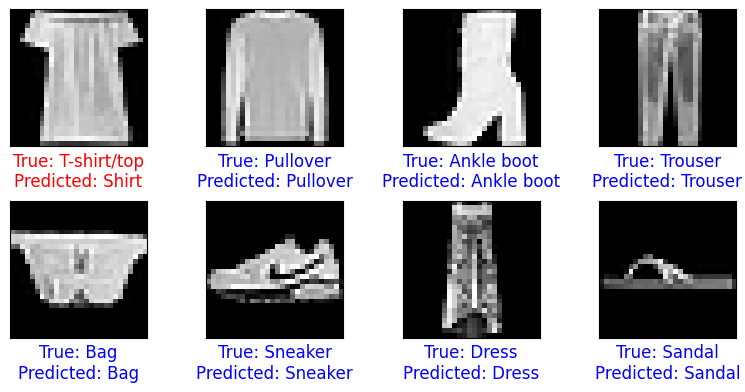

In [147]:
plot_data(X_test, y_test, y_proba)